In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import glob
from datetime import date
from datetime import datetime
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('gdrive/My Drive/EDA NY/ny-jan2019.csv')
df.head()

,date,parameter,location,value,unit,city,attribution,averagingperiod,coordinates,country,sourcename,sourcetype,mobile
0,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Bronx - IS52,0.011,ppm,New York-Northern New Jersey-Long Island,"[{name=US EPA AirNow, url=http://www.airnow.go...","{unit=hours, value=1.0}","{latitude=40.8161, longitude=-73.9022}",US,AirNow,government,False
1,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm10,Bronx - IS52,28.000,µg/m³,New York-Northern New Jersey-Long Island,"[{name=US EPA AirNow, url=http://www.airnow.go...","{unit=hours, value=1.0}","{latitude=40.8161, longitude=-73.9022}",US,AirNow,government,False
2,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Pfizer Lab,0.011,ppm,New York-Northern New Jersey-Long Island,"[{name=US EPA AirNow, url=http://www.airnow.go...","{unit=hours, value=1.0}","{latitude=40.868, longitude=-73.8782}",US,AirNow,government,False
3,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Bklyn - PS274,12.400,µg/m³,New York-Northern New Jersey-Long Island,"[{name=US EPA AirNow, url=http://www.airnow.go...","{unit=hours, value=1.0}","{latitude=40.6944, longitude=-73.9286}",US,AirNow,government,False
4,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Eisenhower Park,11.700,µg/m³,New York-Northern New Jersey-Long Island,"[{name=US EPA AirNow, url=http://www.airnow.go...","{unit=hours, value=1.0}","{latitude=40.7447, longitude=-73.5869}",US,AirNow,government,False


In [ ]:
df.groupby('date').size()

date
{utc=2019-01-01T05:00:00.000Z, local=2019-01-01T00:00:00-05:00}    40
{utc=2019-01-01T06:00:00.000Z, local=2019-01-01T01:00:00-05:00}    45
{utc=2019-01-01T07:00:00.000Z, local=2019-01-01T02:00:00-05:00}    39
{utc=2019-01-01T08:00:00.000Z, local=2019-01-01T03:00:00-05:00}    39
{utc=2019-01-01T09:00:00.000Z, local=2019-01-01T04:00:00-05:00}    39
                                                                   ..
{utc=2019-01-31T00:00:00.000Z, local=2019-01-30T19:00:00-05:00}    44
{utc=2019-01-31T01:00:00.000Z, local=2019-01-30T20:00:00-05:00}    42
{utc=2019-01-31T02:00:00.000Z, local=2019-01-30T21:00:00-05:00}    45
{utc=2019-01-31T03:00:00.000Z, local=2019-01-30T22:00:00-05:00}    45
{utc=2019-01-31T04:00:00.000Z, local=2019-01-30T23:00:00-05:00}    45
Length: 704, dtype: int64

In [ ]:
type(df.iloc[0]['date'])

str

In [ ]:
df = df[['date', 'parameter', 'location', 'value', 'unit', 'coordinates']]
df.head()

,date,parameter,location,value,unit,coordinates
0,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Bronx - IS52,0.011,ppm,"{latitude=40.8161, longitude=-73.9022}"
1,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm10,Bronx - IS52,28.000,µg/m³,"{latitude=40.8161, longitude=-73.9022}"
2,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Pfizer Lab,0.011,ppm,"{latitude=40.868, longitude=-73.8782}"
3,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Bklyn - PS274,12.400,µg/m³,"{latitude=40.6944, longitude=-73.9286}"
4,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Eisenhower Park,11.700,µg/m³,"{latitude=40.7447, longitude=-73.5869}"


In [ ]:
df.head()

,date,parameter,location,value,unit,coordinates
0,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Bronx - IS52,0.011,ppm,"{latitude=40.8161, longitude=-73.9022}"
1,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm10,Bronx - IS52,28.000,µg/m³,"{latitude=40.8161, longitude=-73.9022}"
2,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Pfizer Lab,0.011,ppm,"{latitude=40.868, longitude=-73.8782}"
3,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Bklyn - PS274,12.400,µg/m³,"{latitude=40.6944, longitude=-73.9286}"
4,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Eisenhower Park,11.700,µg/m³,"{latitude=40.7447, longitude=-73.5869}"


In [ ]:
def get_date(data):
  data = data.replace('}', '').replace('{', '')
  date = data.split(',')[1].split('=')[1].split('-05')[0].replace('T', ' ')
  return date
  #starttime = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  #return starttime
df['date2'] = df.date.apply(lambda x: get_date(x))
df.head()

,date,parameter,location,value,unit,coordinates,date2
0,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Bronx - IS52,0.011,ppm,"{latitude=40.8161, longitude=-73.9022}",2019-01-04 12:00:00
1,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm10,Bronx - IS52,28.000,µg/m³,"{latitude=40.8161, longitude=-73.9022}",2019-01-04 12:00:00
2,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",o3,Pfizer Lab,0.011,ppm,"{latitude=40.868, longitude=-73.8782}",2019-01-04 12:00:00
3,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Bklyn - PS274,12.400,µg/m³,"{latitude=40.6944, longitude=-73.9286}",2019-01-04 12:00:00
4,"{utc=2019-01-04T17:00:00.000Z, local=2019-01-0...",pm25,Eisenhower Park,11.700,µg/m³,"{latitude=40.7447, longitude=-73.5869}",2019-01-04 12:00:00


In [ ]:
df['date'] = df['date2']
df = df[['date', 'parameter', 'location', 'value', 'unit', 'coordinates']]

In [ ]:
df.head()

,date,parameter,location,value,unit,coordinates
0,2019-01-04 12:00:00,o3,Bronx - IS52,0.011,ppm,"{latitude=40.8161, longitude=-73.9022}"
1,2019-01-04 12:00:00,pm10,Bronx - IS52,28.000,µg/m³,"{latitude=40.8161, longitude=-73.9022}"
2,2019-01-04 12:00:00,o3,Pfizer Lab,0.011,ppm,"{latitude=40.868, longitude=-73.8782}"
3,2019-01-04 12:00:00,pm25,Bklyn - PS274,12.400,µg/m³,"{latitude=40.6944, longitude=-73.9286}"
4,2019-01-04 12:00:00,pm25,Eisenhower Park,11.700,µg/m³,"{latitude=40.7447, longitude=-73.5869}"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30739 entries, 0 to 30738
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         30739 non-null  object 
 1   parameter    30739 non-null  object 
 2   location     30739 non-null  object 
 3   value        30739 non-null  float64
 4   unit         30739 non-null  object 
 5   coordinates  30739 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
def get_lat(data):
  data = data.replace('}', '').replace('{', '')
  return float(data.split(',')[0].split('=')[1])
def get_lon(data):
  data = data.replace('}', '').replace('{', '')
  return float(data.split(',')[1].split('=')[1])
df['lat'] = df.coordinates.apply(lambda x: get_lat(x))
df['lon'] = df.coordinates.apply(lambda x: get_lon(x))
df.head()

,date,parameter,location,value,unit,coordinates,lat,lon
0,2019-01-04 12:00:00,o3,Bronx - IS52,0.011,ppm,"{latitude=40.8161, longitude=-73.9022}",40.8161,-73.9022
1,2019-01-04 12:00:00,pm10,Bronx - IS52,28.000,µg/m³,"{latitude=40.8161, longitude=-73.9022}",40.8161,-73.9022
2,2019-01-04 12:00:00,o3,Pfizer Lab,0.011,ppm,"{latitude=40.868, longitude=-73.8782}",40.8680,-73.8782
3,2019-01-04 12:00:00,pm25,Bklyn - PS274,12.400,µg/m³,"{latitude=40.6944, longitude=-73.9286}",40.6944,-73.9286
4,2019-01-04 12:00:00,pm25,Eisenhower Park,11.700,µg/m³,"{latitude=40.7447, longitude=-73.5869}",40.7447,-73.5869


In [ ]:
df = df[['date', 'parameter', 'location', 'value', 'unit',  'lat', 'lon']]
df.head()

,date,parameter,location,value,unit,lat,lon
0,2019-01-04 12:00:00,o3,Bronx - IS52,0.011,ppm,40.8161,-73.9022
1,2019-01-04 12:00:00,pm10,Bronx - IS52,28.000,µg/m³,40.8161,-73.9022
2,2019-01-04 12:00:00,o3,Pfizer Lab,0.011,ppm,40.8680,-73.8782
3,2019-01-04 12:00:00,pm25,Bklyn - PS274,12.400,µg/m³,40.6944,-73.9286
4,2019-01-04 12:00:00,pm25,Eisenhower Park,11.700,µg/m³,40.7447,-73.5869


In [ ]:
df.shape

(30739, 7)

In [ ]:
df.location.value_counts()

Newark Firehouse      3217
Elizabeth Trailer     2537
Chester               1939
Bayonne               1936
Jersey City           1916
Fort Lee Near Road    1889
Rutgers University    1798
Bronx - IS52          1392
CCNY                  1389
White Plains          1388
Holtsville            1384
Flemington            1316
Queens                1258
Eisenhower Park        702
Manhattan/IS143        700
Maspeth                700
Bklyn - PS274          697
Pfizer Lab             695
Mt Ninham              686
Fresh Kills            676
Babylon                607
Jersey City FH         604
Queens Near-road       497
Division Street        475
Rahway PM              341
Name: location, dtype: int64

In [ ]:
df_queens = df[df.location=='Queens']
df_queens.head()

,date,parameter,location,value,unit,lat,lon
9,2019-01-04 12:00:00,o3,Queens,0.013,ppm,40.7375,-73.8244
10,2019-01-04 12:00:00,pm25,Queens,13.400,µg/m³,40.7375,-73.8244
26,2019-01-02 15:00:00,o3,Queens,0.014,ppm,40.7375,-73.8244
27,2019-01-02 15:00:00,pm25,Queens,5.800,µg/m³,40.7375,-73.8244
99,2019-01,o3,Queens,0.012,ppm,40.7375,-73.8244


In [ ]:
df_queens = df_queens[df_queens.date != '2019-01']
df_queens.head()

,date,parameter,location,value,unit,lat,lon
9,2019-01-04 12:00:00,o3,Queens,0.013,ppm,40.7375,-73.8244
10,2019-01-04 12:00:00,pm25,Queens,13.400,µg/m³,40.7375,-73.8244
26,2019-01-02 15:00:00,o3,Queens,0.014,ppm,40.7375,-73.8244
27,2019-01-02 15:00:00,pm25,Queens,5.800,µg/m³,40.7375,-73.8244
133,2019-01-04 09:00:00,o3,Queens,0.007,ppm,40.7375,-73.8244


In [ ]:
df_queens.shape

(1210, 7)

In [ ]:
df_queens.parameter.value_counts()

o3      611
pm25    599
Name: parameter, dtype: int64

In [ ]:
queenso3 = df_queens[df_queens.parameter == 'o3']
queenso3.head()

,date,parameter,location,value,unit,lat,lon
9,2019-01-04 12:00:00,o3,Queens,0.013,ppm,40.7375,-73.8244
26,2019-01-02 15:00:00,o3,Queens,0.014,ppm,40.7375,-73.8244
133,2019-01-04 09:00:00,o3,Queens,0.007,ppm,40.7375,-73.8244
254,2019-01-02 09:00:00,o3,Queens,0.020,ppm,40.7375,-73.8244
272,2019-01-06 09:00:00,o3,Queens,0.008,ppm,40.7375,-73.8244


In [ ]:
def get_day(date):
  return date.split(' ')[0].replace('2019-01-','')
def get_hour(date):
  return date.split(' ')[1]
queenso3['day'] = queenso3.date.apply(lambda x: get_day(x))
queenso3['hour'] = queenso3.date.apply(lambda x: get_hour(x))
queenso3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,parameter,location,value,unit,lat,lon,day,hour
9,2019-01-04 12:00:00,o3,Queens,0.013,ppm,40.7375,-73.8244,04,12:00:00
26,2019-01-02 15:00:00,o3,Queens,0.014,ppm,40.7375,-73.8244,02,15:00:00
133,2019-01-04 09:00:00,o3,Queens,0.007,ppm,40.7375,-73.8244,04,09:00:00
254,2019-01-02 09:00:00,o3,Queens,0.020,ppm,40.7375,-73.8244,02,09:00:00
272,2019-01-06 09:00:00,o3,Queens,0.008,ppm,40.7375,-73.8244,06,09:00:00


In [ ]:
qo3 = queenso3.groupby('day').agg({"value": "mean"})
qo3 = pd.DataFrame(qo3)
qo3.head()

,value
day,
01,0.019292
02,0.019182
03,0.013348
04,0.004565
06,0.021708


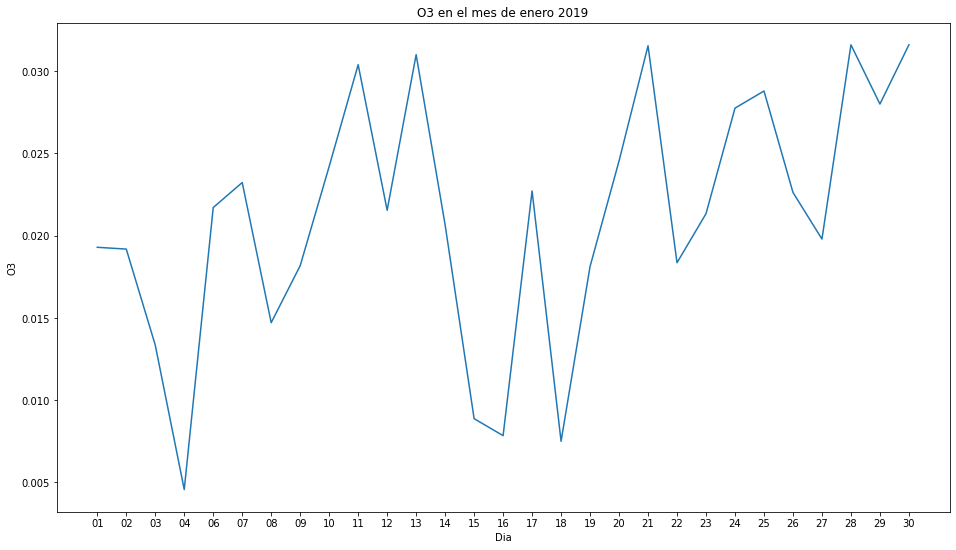

<Figure size 3600x864 with 0 Axes>

In [ ]:
plt.plot(qo3.index, qo3['value'])
plt.title('O3 en el mes de enero 2019')
plt.ylabel('O3')
plt.xlabel('Dia')
plt.figure(figsize=(50,12))
plt.show()